In [1]:
#!/usr/bin/env python3.6
import csv
import sys
print(sys.prefix)
## for the second task
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA
## for the first task
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors as d
from rdkit.Chem import AllChem as CH
from rdkit.Chem import Draw as D
import pandas as pd
from pandas import DataFrame
## for the third task
import numpy as np
from rdkit.Chem import MolFromSmiles
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

/Users/ksjuksu/miniconda3/envs/PNL_KT


In [2]:
#Data : Cyclooxygenase, Rattus norvegicus, targetID CHEMBL2095157, IC50, 501 hits
COX_data = open("bioactivity2-COX.csv")

In [3]:
COX_data

<_io.TextIOWrapper name='bioactivity2-COX.csv' mode='r' encoding='UTF-8'>

In [4]:
with open('bioactivity2-COX.csv', newline = '') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    core_COX = []
    for row in spamreader:
        core_COX.append(row)
#len(core_COX)

In [5]:
core_COX

[['CMPD_CHEMBLID', 'CANONICAL_SMILES', 'STANDARD_VALUE'],
 ['CHEMBL6', 'COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c3ccc(Cl)cc3', '2.9'],
 ['CHEMBL60738', 'CC(C)(C)c1cc(\\C=C\\2/CCN(O)S2(=O)=O)cc(c1O)C(C)(C)C', '10'],
 ['CHEMBL368682',
  'COc1ccc(cc1)n2nc(cc2c3ccc(C)cc3)C#CC(C)N(O)C(=O)C(C)C',
  '40'],
 ['CHEMBL12594', 'CON1CC\\C(=C/c2cc(c(O)c(c2)C(C)(C)C)C(C)(C)C)\\C1=O', '40'],
 ['CHEMBL33958', 'Clc1cc2CC(=O)Oc2cc1C3CCCCC3', '50'],
 ['CHEMBL292324', 'O=C(Nc1nccs1)C2C(=O)N3c4ccccc4Sc5cccc2c35', '70'],
 ['CHEMBL34264', 'Clc1cc2CC(=O)Oc2cc1c3ccccc3', '80'],
 ['CHEMBL60793',
  'CON(C)C(=O)N1CC\\C(=C/c2cc(c(O)c(c2)C(C)(C)C)C(C)(C)C)\\S1(=O)=O',
  '100'],
 ['CHEMBL417073', 'CC(C)(C)c1cc(cc(c1O)C(C)(C)C)c2nnc(N)s2', '130'],
 ['CHEMBL264200',
  'COc1ccc(cc1)n2nc(cc2c3ccc(C)cc3)C#CC(C)N(O)C(=O)C(F)(F)F',
  '190'],
 ['CHEMBL174501',
  'COC(=O)N(O)C(C)C#Cc1cc(c2ccc(Cl)cc2)n(n1)c3ccc(OC)cc3',
  '290'],
 ['CHEMBL293689',
  'CC(C)N1CC\\C(=C/c2cc(c(O)c(c2)C(C)(C)C)C(C)(C)C)\\S1(=O)=O',
  '320'],
 ['CHEMBL36

In [6]:
heading = core_COX[0]
data_COX = core_COX[1:]
heading, data_COX

(['CMPD_CHEMBLID', 'CANONICAL_SMILES', 'STANDARD_VALUE'],
 [['CHEMBL6', 'COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c3ccc(Cl)cc3', '2.9'],
  ['CHEMBL60738',
   'CC(C)(C)c1cc(\\C=C\\2/CCN(O)S2(=O)=O)cc(c1O)C(C)(C)C',
   '10'],
  ['CHEMBL368682',
   'COc1ccc(cc1)n2nc(cc2c3ccc(C)cc3)C#CC(C)N(O)C(=O)C(C)C',
   '40'],
  ['CHEMBL12594', 'CON1CC\\C(=C/c2cc(c(O)c(c2)C(C)(C)C)C(C)(C)C)\\C1=O', '40'],
  ['CHEMBL33958', 'Clc1cc2CC(=O)Oc2cc1C3CCCCC3', '50'],
  ['CHEMBL292324', 'O=C(Nc1nccs1)C2C(=O)N3c4ccccc4Sc5cccc2c35', '70'],
  ['CHEMBL34264', 'Clc1cc2CC(=O)Oc2cc1c3ccccc3', '80'],
  ['CHEMBL60793',
   'CON(C)C(=O)N1CC\\C(=C/c2cc(c(O)c(c2)C(C)(C)C)C(C)(C)C)\\S1(=O)=O',
   '100'],
  ['CHEMBL417073', 'CC(C)(C)c1cc(cc(c1O)C(C)(C)C)c2nnc(N)s2', '130'],
  ['CHEMBL264200',
   'COc1ccc(cc1)n2nc(cc2c3ccc(C)cc3)C#CC(C)N(O)C(=O)C(F)(F)F',
   '190'],
  ['CHEMBL174501',
   'COC(=O)N(O)C(C)C#Cc1cc(c2ccc(Cl)cc2)n(n1)c3ccc(OC)cc3',
   '290'],
  ['CHEMBL293689',
   'CC(C)N1CC\\C(=C/c2cc(c(O)c(c2)C(C)(C)C)C(C)(C)C)\\S1(=O

In [7]:
#s = []
clean_COX = []
for i in data_COX:
    if i[1] != '' and i[2] != '':
        clean_COX.append(i)
len(clean_COX), clean_COX

(449,
 [['CHEMBL6', 'COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c3ccc(Cl)cc3', '2.9'],
  ['CHEMBL60738',
   'CC(C)(C)c1cc(\\C=C\\2/CCN(O)S2(=O)=O)cc(c1O)C(C)(C)C',
   '10'],
  ['CHEMBL368682',
   'COc1ccc(cc1)n2nc(cc2c3ccc(C)cc3)C#CC(C)N(O)C(=O)C(C)C',
   '40'],
  ['CHEMBL12594', 'CON1CC\\C(=C/c2cc(c(O)c(c2)C(C)(C)C)C(C)(C)C)\\C1=O', '40'],
  ['CHEMBL33958', 'Clc1cc2CC(=O)Oc2cc1C3CCCCC3', '50'],
  ['CHEMBL292324', 'O=C(Nc1nccs1)C2C(=O)N3c4ccccc4Sc5cccc2c35', '70'],
  ['CHEMBL34264', 'Clc1cc2CC(=O)Oc2cc1c3ccccc3', '80'],
  ['CHEMBL60793',
   'CON(C)C(=O)N1CC\\C(=C/c2cc(c(O)c(c2)C(C)(C)C)C(C)(C)C)\\S1(=O)=O',
   '100'],
  ['CHEMBL417073', 'CC(C)(C)c1cc(cc(c1O)C(C)(C)C)c2nnc(N)s2', '130'],
  ['CHEMBL264200',
   'COc1ccc(cc1)n2nc(cc2c3ccc(C)cc3)C#CC(C)N(O)C(=O)C(F)(F)F',
   '190'],
  ['CHEMBL174501',
   'COC(=O)N(O)C(C)C#Cc1cc(c2ccc(Cl)cc2)n(n1)c3ccc(OC)cc3',
   '290'],
  ['CHEMBL293689',
   'CC(C)N1CC\\C(=C/c2cc(c(O)c(c2)C(C)(C)C)C(C)(C)C)\\S1(=O)=O',
   '320'],
  ['CHEMBL367010',
   'CCc1ccc(cc1)

In [8]:
len(core_COX), len(clean_COX)

(502, 449)

In [9]:
#clean2_COX = []
#for m in clean_COX:
    #i[2] = float(i[2])
    #clean2_COX.append([m[0], m[1], float(m[2])])

#clean2_COX

In [10]:
#Lipinski rules

def MW(mol):
    return d.MolWt(mol)

def logP(mol):
    return d.MolLogP(mol)

def HBD(mol):
    return d.NumHDonors(mol)

def HBA(mol):
    return d.NumHAcceptors(mol)



In [11]:
#result1 = [[i[0], i[1], float(i[2])] for i in clean_COX]
#result1

In [12]:
result2 = [[i[0], i[1], float(i[2]), MW(CH.MolFromSmiles(i[1])), logP(CH.MolFromSmiles(i[1])), HBD(CH.MolFromSmiles(i[1])), HBA(CH.MolFromSmiles(i[1]))] for i in clean_COX]

In [13]:
# Descriptors for clustering
descriptors = []
for i in result2:
    descriptors.append([i[0],i[3],i[4],i[5],i[6]])
descriptors

[['CHEMBL6', 357.793, 3.9273200000000026, 1, 4],
 ['CHEMBL60738', 353.4840000000001, 3.7528000000000024, 2, 4],
 ['CHEMBL368682', 417.5090000000002, 4.470120000000003, 1, 5],
 ['CHEMBL12594', 331.4560000000001, 4.164300000000003, 1, 3],
 ['CHEMBL33958', 250.72499999999994, 3.8492000000000024, 0, 2],
 ['CHEMBL292324', 365.43900000000014, 4.008300000000002, 1, 5],
 ['CHEMBL34264', 244.67700000000002, 3.4685000000000024, 0, 2],
 ['CHEMBL60793', 424.5630000000002, 3.9768000000000034, 1, 5],
 ['CHEMBL417073', 305.447, 4.087900000000003, 2, 5],
 ['CHEMBL264200', 443.4250000000001, 4.376420000000003, 1, 5],
 ['CHEMBL174501', 425.8720000000001, 4.398900000000003, 1, 6],
 ['CHEMBL293689', 379.56600000000014, 4.772000000000005, 1, 3],
 ['CHEMBL367010', 403.48200000000014, 4.088000000000002, 1, 5],
 ['CHEMBL16828', 336.52600000000007, 5.097400000000004, 1, 5],
 ['CHEMBL49008', 333.4530000000001, 4.311100000000003, 2, 4],
 ['CHEMBL276850', 183.21, 3.5359000000000007, 1, 2],
 ['CHEMBL109745', 428.5

In [14]:
# Metadata for clustering
metadata = []
for i in result2:
    metadata.append([i[0], i[2]])
metadata

[['CHEMBL6', 2.9],
 ['CHEMBL60738', 10.0],
 ['CHEMBL368682', 40.0],
 ['CHEMBL12594', 40.0],
 ['CHEMBL33958', 50.0],
 ['CHEMBL292324', 70.0],
 ['CHEMBL34264', 80.0],
 ['CHEMBL60793', 100.0],
 ['CHEMBL417073', 130.0],
 ['CHEMBL264200', 190.0],
 ['CHEMBL174501', 290.0],
 ['CHEMBL293689', 320.0],
 ['CHEMBL367010', 340.0],
 ['CHEMBL16828', 350.0],
 ['CHEMBL49008', 350.0],
 ['CHEMBL276850', 350.0],
 ['CHEMBL109745', 390.0],
 ['CHEMBL333579', 460.0],
 ['CHEMBL61952', 500.0],
 ['CHEMBL6', 500.0],
 ['CHEMBL148922', 900.0],
 ['CHEMBL304690', 1000.0],
 ['CHEMBL304205', 1900.0],
 ['CHEMBL521', 2000.0],
 ['CHEMBL296543', 2400.0],
 ['CHEMBL62617', 2400.0],
 ['CHEMBL174616', 2900.0],
 ['CHEMBL3144587', 3000.0],
 ['CHEMBL17344', 3300.0],
 ['CHEMBL329781', 3600.0],
 ['CHEMBL366595', 4600.0],
 ['CHEMBL111438', 5100.0],
 ['CHEMBL94851', 5200.0],
 ['CHEMBL84074', 5820.0],
 ['CHEMBL14433', 6000.0],
 ['CHEMBL274642', 6000.0],
 ['CHEMBL46871', 15000.0],
 ['CHEMBL91981', 15000.0],
 ['CHEMBL93310', 22000.0],
 

In [15]:
# writing documents for descriptors and metadata
out = open("descriptors.csv", "w")
out.write("ID,MW,logP,HBD,HBA\n")
for i,MW,logP,HBD,HBA in descriptors:
    #print(i,MW,logP,HBD,HBA)
    out.write("%s,%f,%f,%f,%f\n" % (i, MW, logP, HBD, HBA))
out.close()

out = open("metadata.csv", "w")
out.write("ID,SA\n") #standard activity
for ID,SA in metadata:
    out.write("%s,%f\n" % (ID, SA))
out.close()


In [16]:
# drawing moleculed from smiles
mol_visual = []
for i in result2:
    vis = CH.MolFromSmiles(i[1])
    mol_visual.append([i[0], vis])
mol_visual

[['CHEMBL6', <rdkit.Chem.rdchem.Mol at 0x114a383a0>],
 ['CHEMBL60738', <rdkit.Chem.rdchem.Mol at 0x114a38350>],
 ['CHEMBL368682', <rdkit.Chem.rdchem.Mol at 0x114a383f0>],
 ['CHEMBL12594', <rdkit.Chem.rdchem.Mol at 0x114a38440>],
 ['CHEMBL33958', <rdkit.Chem.rdchem.Mol at 0x114a38490>],
 ['CHEMBL292324', <rdkit.Chem.rdchem.Mol at 0x114a384e0>],
 ['CHEMBL34264', <rdkit.Chem.rdchem.Mol at 0x114a38530>],
 ['CHEMBL60793', <rdkit.Chem.rdchem.Mol at 0x114a38580>],
 ['CHEMBL417073', <rdkit.Chem.rdchem.Mol at 0x114a1adf0>],
 ['CHEMBL264200', <rdkit.Chem.rdchem.Mol at 0x114a38670>],
 ['CHEMBL174501', <rdkit.Chem.rdchem.Mol at 0x114a386c0>],
 ['CHEMBL293689', <rdkit.Chem.rdchem.Mol at 0x114a38710>],
 ['CHEMBL367010', <rdkit.Chem.rdchem.Mol at 0x114a38760>],
 ['CHEMBL16828', <rdkit.Chem.rdchem.Mol at 0x114a387b0>],
 ['CHEMBL49008', <rdkit.Chem.rdchem.Mol at 0x114a38800>],
 ['CHEMBL276850', <rdkit.Chem.rdchem.Mol at 0x114a38850>],
 ['CHEMBL109745', <rdkit.Chem.rdchem.Mol at 0x114a388a0>],
 ['CHEMBL

In [17]:
for ID,image in mol_visual:
    filename = 'ID' + str(ID) + '.png'
    D.MolToFile(image, filename)

In [18]:
# PCA visualization
df = pd.DataFrame(descriptors,columns=["CMPD_CHEMBLID", "MW", "logP", "HBD", "HBA"])
df[:10]

,CMPD_CHEMBLID,MW,logP,HBD,HBA
0,CHEMBL6,357.793,3.92732,1,4
1,CHEMBL60738,353.484,3.75280,2,4
2,CHEMBL368682,417.509,4.47012,1,5
3,CHEMBL12594,331.456,4.16430,1,3
4,CHEMBL33958,250.725,3.84920,0,2
5,CHEMBL292324,365.439,4.00830,1,5
6,CHEMBL34264,244.677,3.46850,0,2
7,CHEMBL60793,424.563,3.97680,1,5
8,CHEMBL417073,305.447,4.08790,2,5
9,CHEMBL264200,443.425,4.37642,1,5


In [19]:
# pca components
pca = PCA(df[['MW', 'logP', 'HBD', 'HBA']],standardize=True)
pca.Y


array([[-0.22247204,  0.524809  ,  0.27367036, -0.13250837],
       [-0.53563874, -0.45085599, -0.54343596, -0.29056512],
       [-1.40529456,  0.74811037,  0.61282854, -0.14581811],
       ...,
       [-0.49763152, -1.28090515,  2.26120156, -0.54663503],
       [ 0.5428862 ,  0.09464292,  0.25106717,  0.40340073],
       [ 1.71482669, -3.47547628,  1.62939263, -1.7386226 ]])

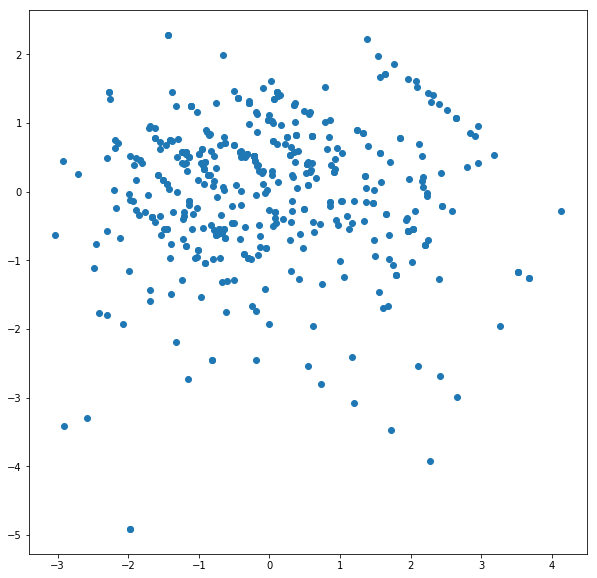

In [20]:
# plotting two first elements of pca
plot = plt.figure(figsize=(10, 10))
x = [x[0] for x in pca.Y]
y = [x[1] for x in pca.Y]
plt.scatter(x,y) 

plot

In [21]:
# Activity prediction
model_data = DataFrame(clean_COX, columns=["ID","SMILES","SA"])
model_data.set_index("ID", inplace=True)
model_data

,SMILES,SA
ID,,
CHEMBL6,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c3ccc(Cl)cc3,2.9
CHEMBL60738,CC(C)(C)c1cc(\C=C\2/CCN(O)S2(=O)=O)cc(c1O)C(C)...,10
CHEMBL368682,COc1ccc(cc1)n2nc(cc2c3ccc(C)cc3)C#CC(C)N(O)C(=...,40
CHEMBL12594,CON1CC\C(=C/c2cc(c(O)c(c2)C(C)(C)C)C(C)(C)C)\C1=O,40
CHEMBL33958,Clc1cc2CC(=O)Oc2cc1C3CCCCC3,50
CHEMBL292324,O=C(Nc1nccs1)C2C(=O)N3c4ccccc4Sc5cccc2c35,70
CHEMBL34264,Clc1cc2CC(=O)Oc2cc1c3ccccc3,80
CHEMBL60793,CON(C)C(=O)N1CC\C(=C/c2cc(c(O)c(c2)C(C)(C)C)C(...,100
CHEMBL417073,CC(C)(C)c1cc(cc(c1O)C(C)(C)C)c2nnc(N)s2,130


In [22]:
model_data["pSA"] = model_data.SA.apply(lambda x : -1.0 * np.log10(float(x) / 1.0e9))

In [23]:
descriptors_list = d.descList
#descriptors_list

In [24]:
# choosing the descriptors
desc_counting =[]
for i in descriptors_list:
    if 'Chi' in i[0]:
            desc_counting.append(i)
desc_counting

[('Chi0', <function rdkit.Chem.GraphDescriptors.Chi0>),
 ('Chi0n', <function rdkit.Chem.GraphDescriptors.<lambda>>),
 ('Chi0v', <function rdkit.Chem.GraphDescriptors.<lambda>>),
 ('Chi1', <function rdkit.Chem.GraphDescriptors.Chi1>),
 ('Chi1n', <function rdkit.Chem.GraphDescriptors.<lambda>>),
 ('Chi1v', <function rdkit.Chem.GraphDescriptors.<lambda>>),
 ('Chi2n', <function rdkit.Chem.GraphDescriptors.<lambda>>),
 ('Chi2v', <function rdkit.Chem.GraphDescriptors.<lambda>>),
 ('Chi3n', <function rdkit.Chem.GraphDescriptors.<lambda>>),
 ('Chi3v', <function rdkit.Chem.GraphDescriptors.<lambda>>),
 ('Chi4n', <function rdkit.Chem.GraphDescriptors.<lambda>>),
 ('Chi4v', <function rdkit.Chem.GraphDescriptors.<lambda>>)]

In [25]:
for name, func in desc_counting:
    values = []
    for smiles in model_data["SMILES"]:
        #print(smiles)
        mol = MolFromSmiles(smiles)
        values.append(func(mol))
    model_data[name] = values
model_data[:10]

,SMILES,SA,pSA,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v
ID,,,,,,,,,,,,,,,
CHEMBL6,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c3ccc(Cl)cc3,2.9,8.537602,18.137464,13.745695,14.501624,11.917923,7.620538,7.998502,5.665014,6.101450,4.164154,4.416130,2.947005,3.072993
CHEMBL60738,CC(C)(C)c1cc(\C=C\2/CCN(O)S2(=O)=O)cc(c1O)C(C)...,10,8.000000,18.499636,15.212650,16.029147,10.742054,8.045470,9.485534,8.376126,10.272134,4.234200,5.956311,2.806428,4.043025
CHEMBL368682,COc1ccc(cc1)n2nc(cc2c3ccc(C)cc3)C#CC(C)N(O)C(=...,40,7.397940,22.543241,18.456204,18.456204,14.794933,10.148608,10.148608,7.673491,7.673491,4.869366,4.869366,2.987311,2.987311
CHEMBL12594,CON1CC\C(=C/c2cc(c(O)c(c2)C(C)(C)C)C(C)(C)C)\C1=O,40,7.397940,18.284093,15.857188,15.857188,10.946726,8.393992,8.393992,8.474042,8.474042,4.395009,4.395009,2.983497,2.983497
CHEMBL33958,Clc1cc2CC(=O)Oc2cc1C3CCCCC3,50,7.301030,11.828063,9.669153,10.425081,8.237183,6.268334,6.646298,4.967225,5.374425,3.783394,4.110721,2.884138,3.224702
CHEMBL292324,O=C(Nc1nccs1)C2C(=O)N3c4ccccc4Sc5cccc2c35,70,7.154902,16.965891,12.800923,14.433916,12.237183,7.679675,9.375824,5.696938,7.675281,4.282875,6.085885,3.268162,4.899863
CHEMBL34264,Clc1cc2CC(=O)Oc2cc1c3ccccc3,80,7.096910,11.828063,8.943020,9.698949,8.237183,5.323846,5.701810,3.956650,4.363850,2.793551,3.106260,1.980901,2.276270
CHEMBL60793,CON(C)C(=O)N1CC\C(=C/c2cc(c(O)c(c2)C(C)(C)C)C(...,100,7.000000,22.361443,18.529147,19.345643,13.101426,9.534844,10.974908,9.365073,11.280356,5.015285,6.918957,3.252134,4.821710
CHEMBL417073,CC(C)(C)c1cc(cc(c1O)C(C)(C)C)c2nnc(N)s2,130,6.886057,15.999636,13.481940,14.298436,9.498037,6.972444,7.788941,7.365426,8.374525,3.413524,4.215013,2.252600,2.849700


In [26]:
train_data, test_data = train_test_split(model_data, test_size=0.3)
train_data[:10]

,SMILES,SA,pSA,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v
ID,,,,,,,,,,,,,,,
CHEMBL292707,CC(C)Cc1ccc(cc1)C(C)C(=O)NO,10000,5.000000,12.129392,10.026670,10.026670,7.540913,5.570301,5.570301,4.537295,4.537295,2.627146,2.627146,1.661999,1.661999
CHEMBL295243,CNC(=S)N(O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c3ccc(OC...,7100,5.148742,20.421921,15.692909,17.265334,13.366611,8.533212,9.319425,6.207301,7.030435,4.592330,5.259179,3.122849,3.313387
CHEMBL435907,COc1ccc(cc1)n2nc(cc2c3ccc(Cl)cc3)C#CC(C)N(O)C(...,30,7.522879,20.965891,16.256818,17.012747,13.884249,8.894215,9.272179,6.340439,6.776874,4.264949,4.516925,2.700943,2.826931
CHEMBL1626563,CC(C)(C)c1cc(cc(c1O)C(C)(C)C)c2nsc(NC#N)n2.C[N...,11,7.958607,23.328063,19.621479,20.437975,13.596702,9.855977,10.629373,10.297969,11.049816,4.335113,4.965623,2.620185,3.157937
CHEMBL368682,COc1ccc(cc1)n2nc(cc2c3ccc(C)cc3)C#CC(C)N(O)C(=...,40,7.397940,22.543241,18.456204,18.456204,14.794933,10.148608,10.148608,7.673491,7.673491,4.869366,4.869366,2.987311,2.987311
CHEMBL347053,Cc1cc(on1)\C=C\c2ccccc2,30000,4.522879,9.803119,7.974264,7.974264,6.843337,4.509023,4.509023,3.114679,3.114679,1.885813,1.885813,1.204334,1.204334
CHEMBL12302,Cc1cc(on1)\C=C\c2cc(c(O)c(c2)C(C)(C)C)C(C)(C)C,1500,5.823909,17.413849,15.189427,15.189427,10.481200,7.976646,7.976646,8.168628,8.168628,3.834515,3.834515,2.536636,2.536636
CHEMBL93670,CCO\C(=C(\C=CC(=O)C(=O)OCC)/c1ccccc1)\O,50000,4.301030,15.664926,12.035872,12.035872,10.095754,6.603034,6.603034,3.935920,3.935920,2.474248,2.474248,1.552455,1.552455
CHEMBL148850,Cc1cc(on1)\C=C\c2cc(Cl)c(O)c(Cl)c2,13800,4.860121,12.413849,8.945356,10.457214,8.058551,4.854611,5.610540,3.537153,4.351553,2.125464,2.701695,1.321527,1.825470


In [27]:
test_data[:10]

,SMILES,SA,pSA,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v
ID,,,,,,,,,,,,,,,
CHEMBL54453,CN(O)C(=O)Cc1ccc(OCc2ccccc2)cc1,9000,5.045757,14.372033,11.321290,11.321290,9.647867,6.360455,6.360455,4.512346,4.512346,2.887965,2.887965,1.733465,1.733465
CHEMBL34410,CC1C(=O)Oc2cc(C3CCCCC3)c(C)cc12,100,7.000000,12.698306,11.161432,11.161432,8.664704,7.026945,7.026945,5.724342,5.724342,4.474071,4.474071,3.330044,3.330044
CHEMBL307484,Nc1c(cccc1C(=O)c2ccc(Cl)cc2)C(=O)CCC(=O)O,1000000,3.000000,16.982763,12.082939,12.838868,10.896755,6.836128,7.214092,4.919741,5.356177,3.323496,3.575472,2.118254,2.244242
CHEMBL299794,FC(F)(F)c1cccc(Nc2ccccc2C3=NNC(=S)S3)c1,850,6.070581,16.449383,11.516406,13.149399,10.931672,6.525250,7.749995,4.667426,6.333164,3.064484,4.187003,2.052461,2.981046
CHEMBL303303,Fc1cc2CCCN3C(=O)C(C(=O)Nc4nc5ccccc5s4)c(c1)c23,30000,4.522879,17.836134,13.659909,14.476405,12.614194,8.417763,9.234260,6.505182,7.535831,4.891053,5.842885,3.823880,4.692663
CHEMBL2079592,CN1N=C(SC1=S)c2cc(c(O)c(c2)C(C)(C)C)C(C)(C)C,650,6.187087,16.869879,14.312838,15.945831,9.908721,7.335107,8.559852,7.716703,9.339340,3.661929,5.125698,2.364266,3.379235
CHEMBL6,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c3ccc(Cl)cc3,500,6.301030,18.137464,13.745695,14.501624,11.917923,7.620538,7.998502,5.665014,6.101450,4.164154,4.416130,2.947005,3.072993
CHEMBL538059,Cl.OCCN1CCN(CC1)C(=O)CN2C(=O)Sc3ccc(Cl)cc23,100000,4.000000,16.396977,12.981610,15.370532,11.079719,7.481481,8.675942,5.512196,6.941823,4.064033,5.259271,2.782558,3.819891
CHEMBL64891,CC(C)(C)c1cc(\C=C/2\CCN(c3ccccn3)S2(=O)=O)cc(c...,4400,5.356547,21.612520,18.022051,18.838548,13.314534,9.839558,11.279621,9.590393,11.505676,5.163498,7.098044,3.557474,5.160711


In [28]:
columns = [x[0] for x in desc_counting]
model = RandomForestRegressor()
model.fit(train_data[columns], train_data["pSA"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

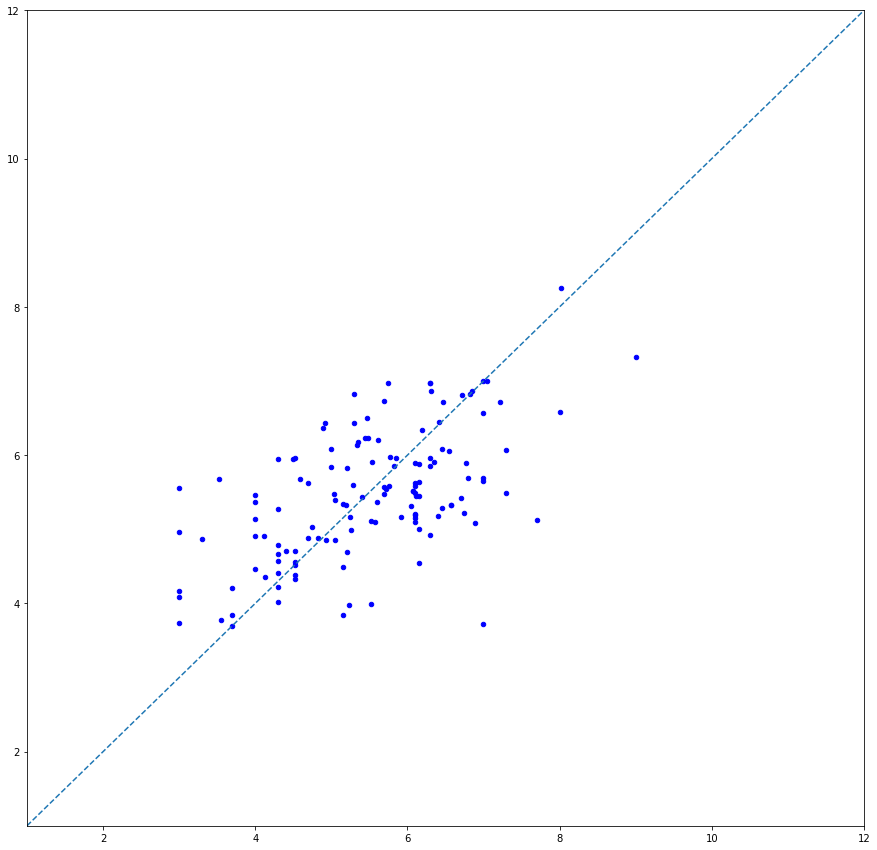

In [30]:
plt.rcParams["figure.figsize"] = [15, 15]
span = (1,12)
axes = plt.gca()
axes.set_xlim(span)
axes.set_ylim(span)

plt.plot((span[0],span[1]), (span[0],span[1]), linestyle='--')


plt.scatter(
    test_data["pSA"]
    , model.predict(test_data[columns])
    , c='blue'
    , s=20
)
plt.show()

In [99]:
print("R^2: %0.2f" % model.score(test_data[columns], test_data.pSA))
print("R: %0.2f" % np.sqrt(model.score(test_data[columns], test_data.pSA)))
print("MSE: %0.2f" %  mean_squared_error(model.predict(test_data[columns]), test_data.pSA))

R^2: 0.43
R: 0.65
MSE: 0.78


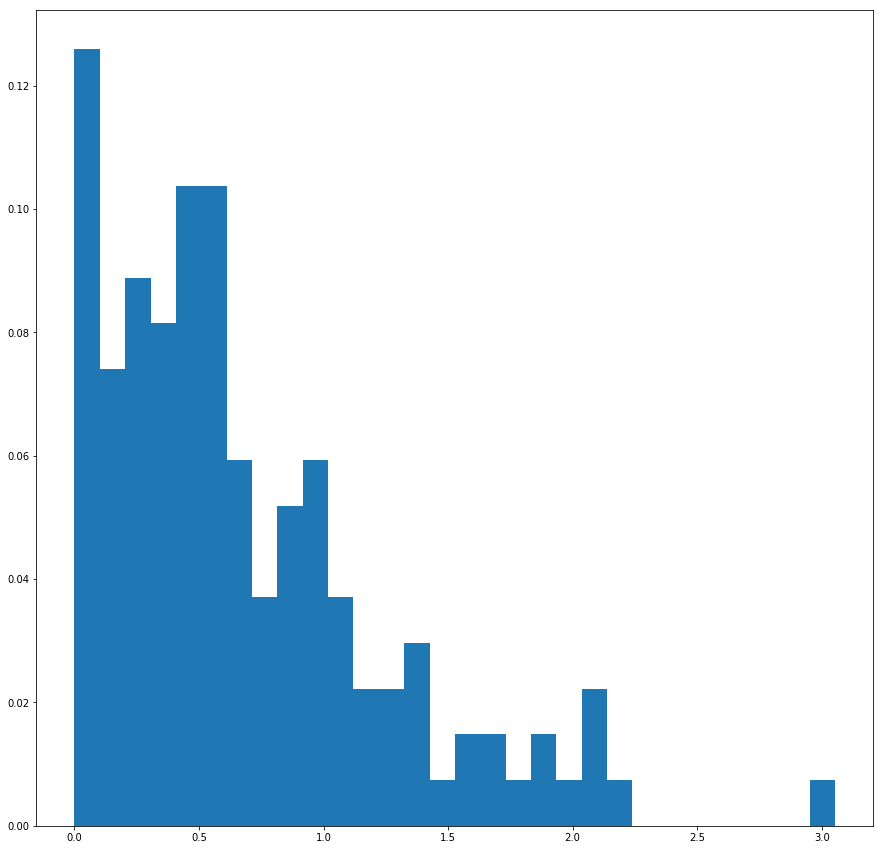

In [100]:
errors = (test_data.pSA - model.predict(test_data[columns])).abs()
weights = np.ones_like(errors) / len(errors)
plt.hist(errors, weights=weights, bins=30)
plt.show()